In [2]:
import iplantuml

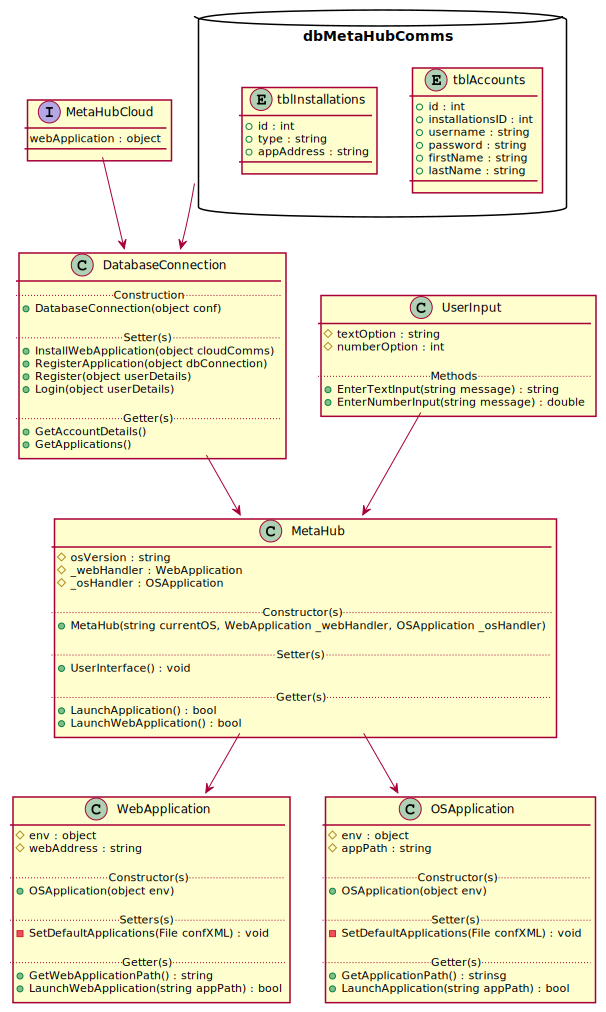

In [41]:
%%plantuml 

@startuml
    interface MetaHubCloud {
        webApplication : object
    }

    database dbMetaHubComms {
        entity tblAccounts {
            + id : int
            + installationsID : int
            + username : string
            + password : string
            + firstName : string
            + lastName : string
        }

        entity tblInstallations {
            + id : int
            + type : string
            + appAddress : string
        }
    }

    class UserInput 
    {
        # textOption : string
        # numberOption : int

        .. Methods ..
        + EnterTextInput(string message) : string
        + EnterNumberInput(string message) : double
    }

    class DatabaseConnection {
        .. Construction ..
        + DatabaseConnection(object conf)

        .. Setter(s) ..
        + InstallWebApplication(object cloudComms)
        + RegisterApplication(object dbConnection)
        + Register(object userDetails)
        + Login(object userDetails)

        .. Getter(s) ..
        + GetAccountDetails()
        + GetApplications()
    }

    class MetaHub
    {
        # osVersion : string
        # _webHandler : WebApplication
        # _osHandler : OSApplication

        .. Constructor(s) ..
        + MetaHub(string currentOS, WebApplication _webHandler, OSApplication _osHandler)
        
        .. Setter(s) ..
        + UserInterface() : void

        .. Getter(s) ..
        + LaunchApplication() : bool
        + LaunchWebApplication() : bool
    }

    class WebApplication
    {
        # env : object
        # webAddress : string

        .. Constructor(s) ..
        + OSApplication(object env)

        .. Setters(s) ..
        - SetDefaultApplications(File confXML) : void

        .. Getter(s) ..
        + GetWebApplicationPath() : string
        + LaunchWebApplication(string appPath) : bool
    }

    class OSApplication
    {
        # env : object
        # appPath : string

        .. Constructor(s) ..
        + OSApplication(object env)

        .. Setter(s) ..
        - SetDefaultApplications(File confXML) : void

        .. Getter(s) ..
        + GetApplicationPath() : strinsg
        + LaunchApplication(string appPath) : bool
    }

    dbMetaHubComms-->DatabaseConnection
    MetaHubCloud-->DatabaseConnection
    DatabaseConnection-->MetaHub
    UserInput-->MetaHub
    MetaHub-->WebApplication
    MetaHub-->OSApplication

@enduml

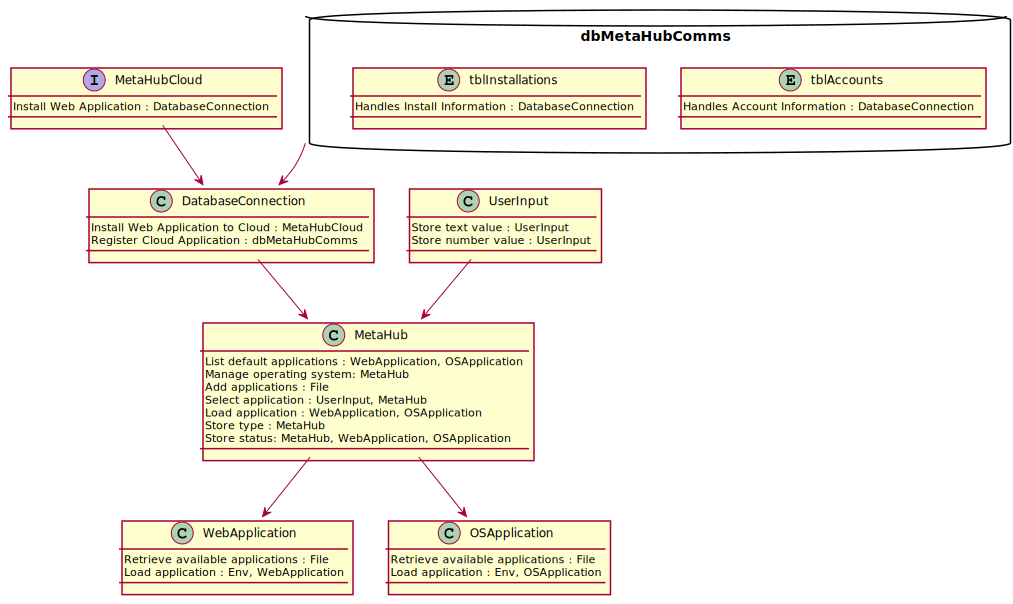

In [39]:
%%plantuml 

@startuml
    interface MetaHubCloud {
        Install Web Application : DatabaseConnection
    }

    database dbMetaHubComms {
        entity tblAccounts {
            Handles Account Information : DatabaseConnection
        }

        entity tblInstallations {
            Handles Install Information : DatabaseConnection
        }
    }


    class UserInput {
        Store text value : UserInput
        Store number value : UserInput
    }

    class DatabaseConnection {
        Install Web Application to Cloud : MetaHubCloud
        Register Cloud Application : dbMetaHubComms
    }

    class MetaHub
    {
        List default applications : WebApplication, OSApplication
        Manage operating system: MetaHub
        Add applications : File
        Select application : UserInput, MetaHub
        Load application : WebApplication, OSApplication
        Store type : MetaHub
        Store status: MetaHub, WebApplication, OSApplication
    }
    
    class WebApplication
    {
        Retrieve available applications : File
        Load application : Env, WebApplication
    }

    class OSApplication
    {
        Retrieve available applications : File
        Load application : Env, OSApplication
    }
  
    dbMetaHubComms --> DatabaseConnection
    MetaHubCloud --> DatabaseConnection
    DatabaseConnection --> MetaHub

    UserInput --> MetaHub
    MetaHub --> WebApplication
    MetaHub --> OSApplication
    
@enduml

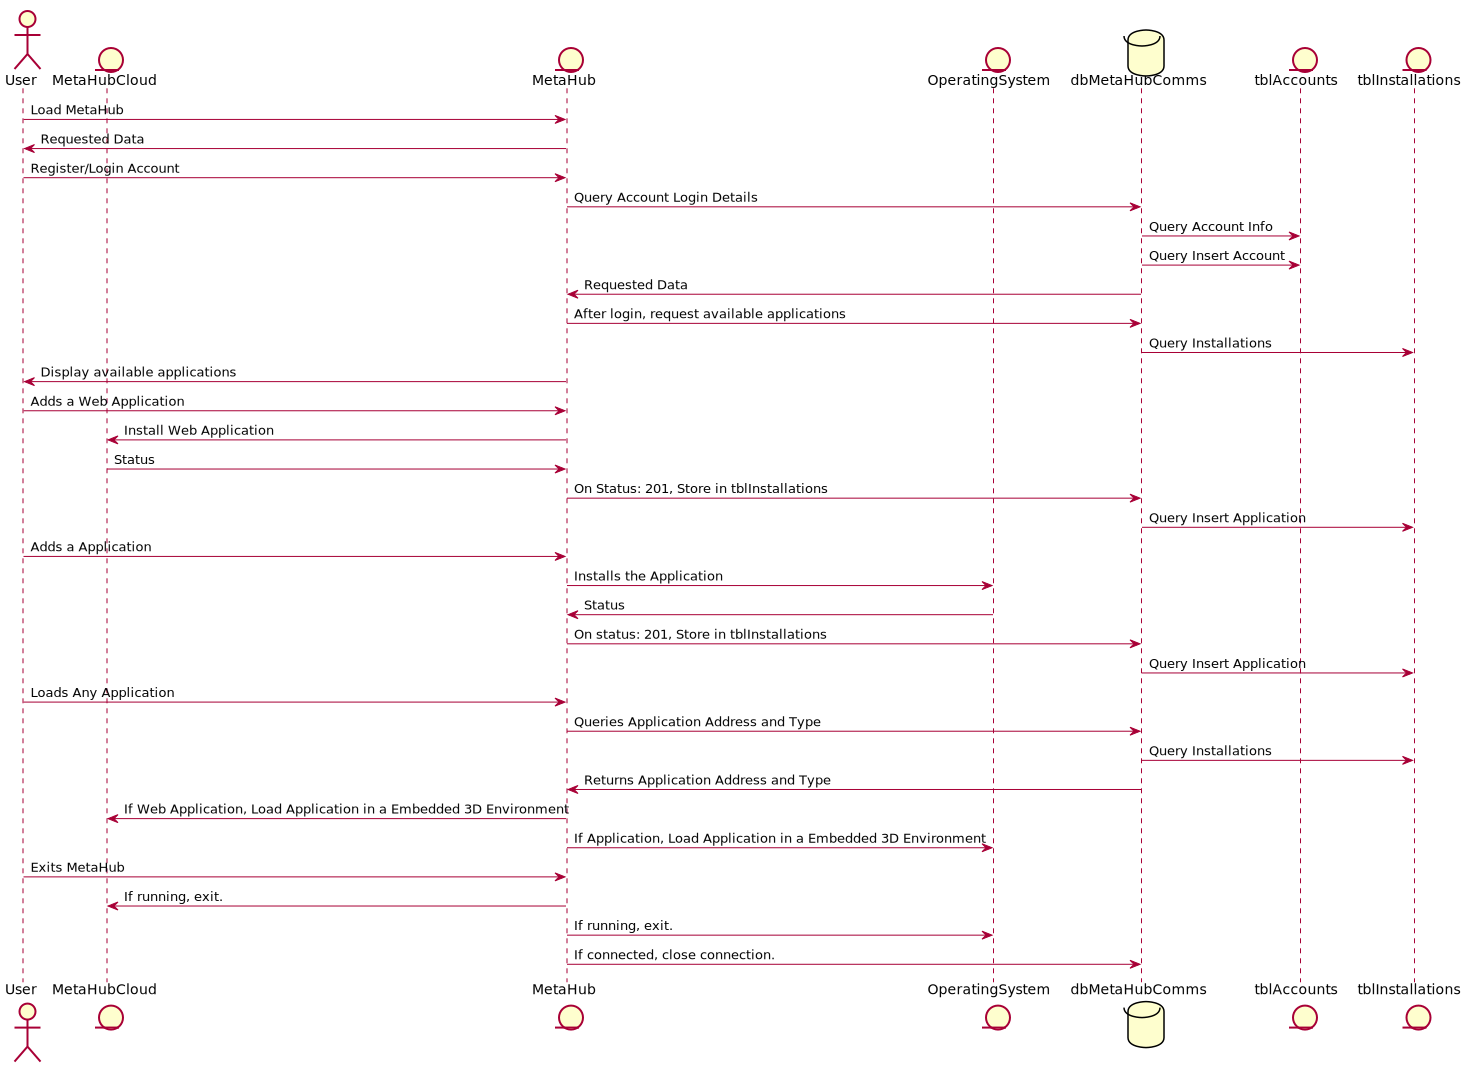

In [89]:
%%plantuml

@startuml
    actor User as user1

    entity MetaHubCloud as mhcloud
    entity MetaHub as mhub
    entity OperatingSystem as os
    
    database dbMetaHubComms as dbmh
    entity tblAccounts
    entity tblInstallations

    user1 -> mhub : Load MetaHub
    mhub -> user1 : Requested Data
    
    user1 -> mhub : Register/Login Account
    mhub -> dbmh : Query Account Login Details
    dbmh -> tblAccounts : Query Account Info
    dbmh -> tblAccounts : Query Insert Account
    dbmh -> mhub : Requested Data

    mhub -> dbmh : After login, request available applications
    dbmh -> tblInstallations : Query Installations
    mhub -> user1 : Display available applications
    
    user1 -> mhub : Adds a Web Application
    mhub -> mhcloud : Install Web Application
    mhcloud -> mhub : Status
    mhub -> dbmh : On Status: 201, Store in tblInstallations
    dbmh -> tblInstallations : Query Insert Application

    user1 -> mhub : Adds a Application
    mhub -> os : Installs the Application
    os -> mhub : Status
    mhub -> dbmh : On status: 201, Store in tblInstallations
    dbmh -> tblInstallations : Query Insert Application

    user1 -> mhub : Loads Any Application
    mhub -> dbmh : Queries Application Address and Type
    dbmh -> tblInstallations : Query Installations
    dbmh -> mhub : Returns Application Address and Type
    mhub -> mhcloud : If Web Application, Load Application in a Embedded 3D Environment
    mhub -> os : If Application, Load Application in a Embedded 3D Environment

    user1 -> mhub : Exits MetaHub
    mhub -> mhcloud : If running, exit.
    mhub -> os : If running, exit.
    mhub -> dbmh : If connected, close connection.

@enduml